In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.select_dtypes(["int","float"]).corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [7]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [8]:
# drop unnecessary columns
df.drop(columns=["availability","society"], inplace=True)

#### df2

In [10]:
df2 = df.copy()

In [11]:
# transforming total_sqft column to new one
import re
def total_square_foot(col):
    pattern_minus = re.search(r'(\d+) - (\d+)', col)
    pattern_point = re.search(r'(\d+)\.', col)
    if pattern_minus:
        g1 = int(pattern_minus.group(1))
        g2 = int(pattern_minus.group(2))
        g3 = (g1+g2)/2
        return g3
    elif pattern_point:
        g1 = int(pattern_point.group(1))
        return g1
    elif "Sq. Meter" in col:
        r = col.replace("Sq. Meter","")
        sqft = int(r)*10.76
        return sqft
    elif "Sq. Yards" in col:
        r = col.replace("Sq. Yards","")
        sqft = int(r)*9
        return sqft
    elif "Cents" in col:
        r = col.replace("Cents","")
        sqft = int(r)*435.6
        return sqft
    elif "Guntha" in col:
        r = col.replace("Guntha","")
        sqft = int(r)*1089
        return sqft
    elif "Grounds" in col:
        r = col.replace("Grounds","")
        sqft = int(r)*2400
        return sqft
    elif "Acres" in col:
        r = col.replace("Acres","")
        sqft = int(r)*43560
        return sqft
    elif "Perch" in col:
        r = col.replace("Perch","")
        sqft = int(r)*272.25
        return sqft
    else:
        return col

df2["total_sqft"] = df2["total_sqft"].apply(total_square_foot)

In [13]:
df2["total_sqft"] = df2["total_sqft"].astype("int")
df2["price"] = df2["price"].astype("int")

In [15]:
df2.dtypes

area_type      object
location       object
size           object
total_sqft      int32
bath          float64
balcony       float64
price           int32
dtype: object

#### df3

In [16]:
df3 = df2.copy()

In [24]:
# fill null values
df3["balcony"] = df3["balcony"].fillna(df3["balcony"].mode()[0])
df3["bath"] = df3["bath"].fillna(df3["bath"].mode()[0])
df3["size"] = df3["size"].fillna(df3["size"].mode()[0])
df3["location"] = df3["location"].fillna(df3["location"].mode()[0])

In [25]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [26]:
df3.select_dtypes(["int","float"]).corr()

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.055338,0.012107,0.049000
bath,0.055338,1.000000,0.207970,0.454625
balcony,0.012107,0.207970,1.000000,0.125070
price,0.049000,0.454625,0.125070,1.000000


In [27]:
# clean size column
df3["size"] = df3["size"].apply(lambda x: x.split(" ")[0])

In [28]:
df3.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51


In [29]:
df3['size'] = df3['size'].astype("int")

#### df4

In [30]:
df4 = df3.copy()

In [31]:
# remove additional spaces
df4["location"] = df4["location"].apply(lambda x:x.strip())

### Select main locations from 1294 different locations

In [32]:
location = df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
location

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [33]:
len(location)

1294

In [37]:
len(location[location<30])

1194

In [38]:
location_less10 = location[location<=30]
location_less10

location
Kumaraswami Layout       30
Ananth Nagar             30
Chikkalasandra           30
Doddathoguru             30
Dodda Nekkundi           29
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1198, dtype: int64

In [39]:
df4["location"] = df4["location"].apply(lambda x: "other" if x in location_less10 else x)

In [40]:
len(df4["location"].unique())

97

In [41]:
df4.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39
1,Plot Area,other,4,2600,5.0,3.0,120
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62
3,Super built-up Area,other,3,1521,3.0,1.0,95
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51


In [42]:
df4.dtypes

area_type      object
location       object
size            int32
total_sqft      int32
bath          float64
balcony       float64
price           int32
dtype: object

In [43]:
df4["bath"] = df4["bath"].astype("int")
df4["balcony"] = df4["balcony"].astype("int")

# Distribution Visualization

Text(0.5, 1.0, 'Price Distribution')

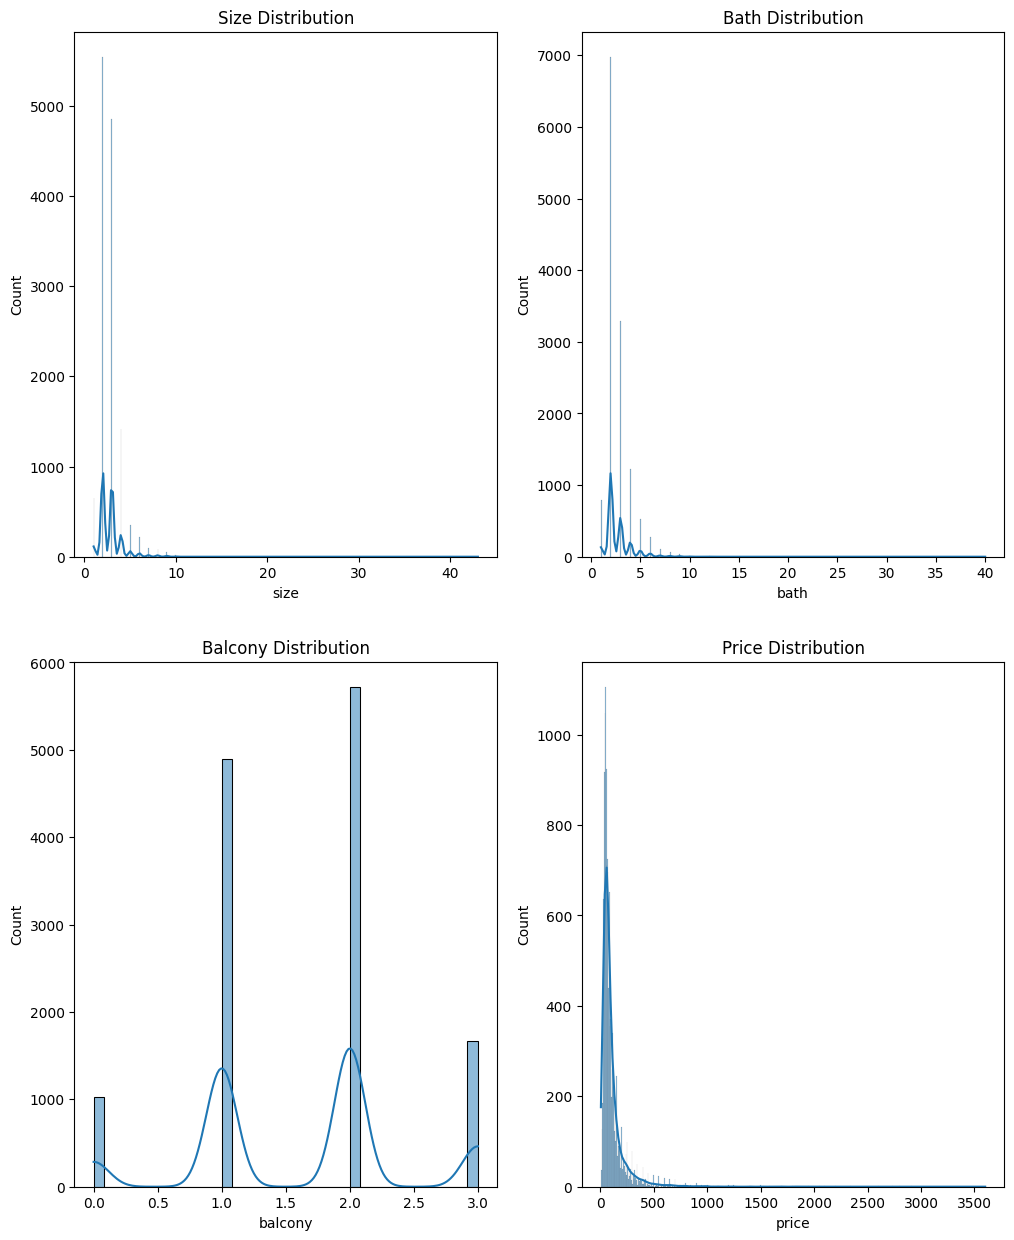

In [48]:
# Check distribution of data
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,15))

sns.histplot(x=df4["size"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Size Distribution")

sns.histplot(x=df4["bath"], kde=True, ax=axes[0,1])
axes[0,1].set_title("Bath Distribution")

sns.histplot(x=df4["balcony"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Balcony Distribution")

sns.histplot(x=df4["price"], kde=True, ax=axes[1,1])
axes[1,1].set_title("Price Distribution")

# BoxPlot Visualization

Text(0.5, 1.0, 'Price Boxplot')

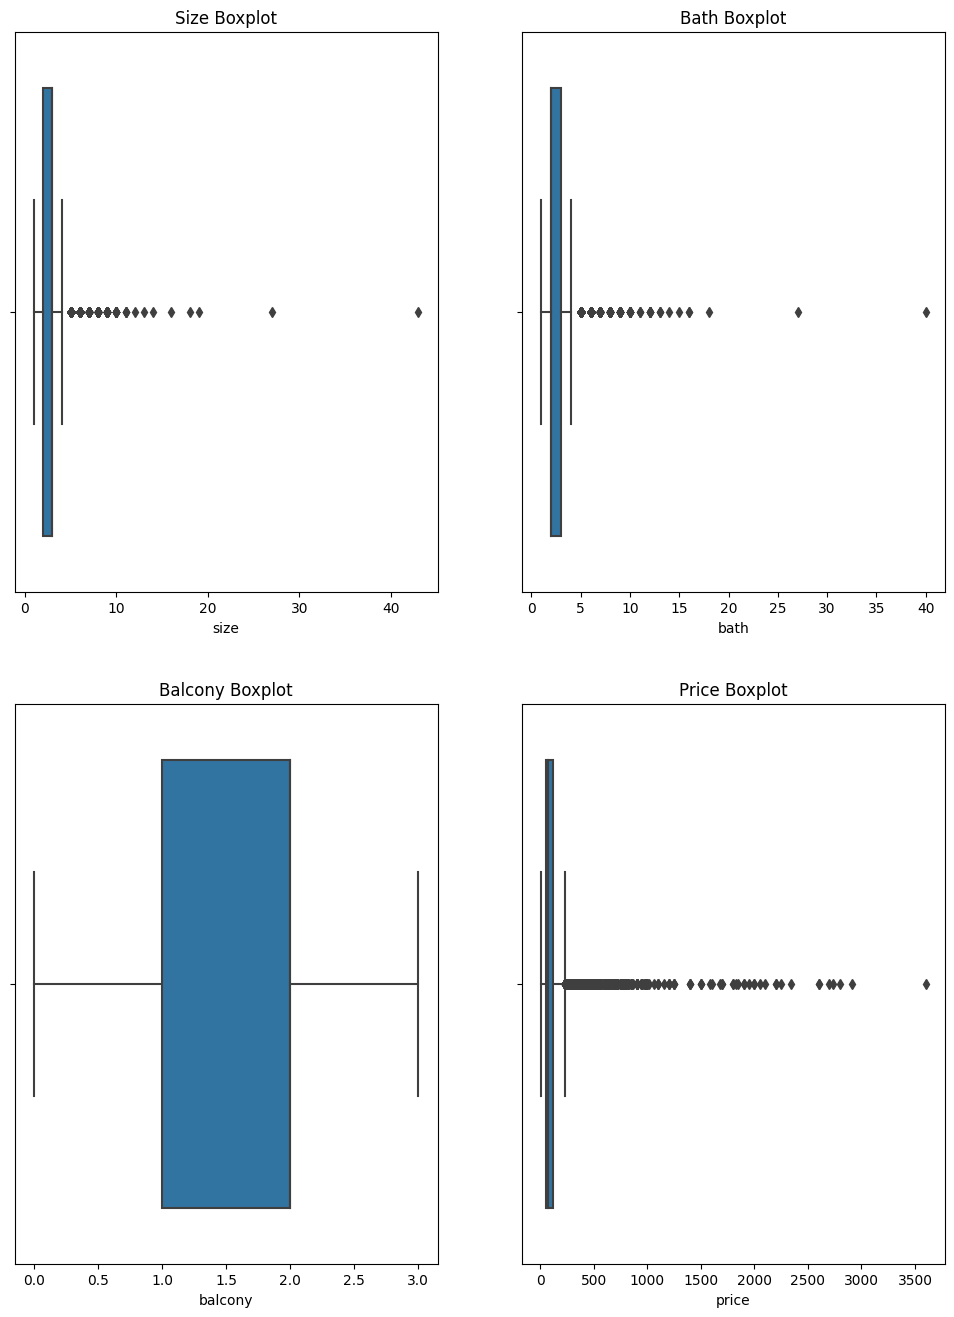

In [49]:
# Check distribution of data
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,16))

sns.boxplot(x=df4["size"], ax=axes[0,0])
axes[0,0].set_title("Size Boxplot")

sns.boxplot(x=df4["bath"], ax=axes[0,1])
axes[0,1].set_title("Bath Boxplot")

sns.boxplot(x=df4["balcony"], ax=axes[1,0])
axes[1,0].set_title("Balcony Boxplot")

sns.boxplot(x=df4["price"], ax=axes[1,1])
axes[1,1].set_title("Price Boxplot")

#### df5

In [91]:
df5 = df4.copy()

In [92]:
df5.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,39
1,Plot Area,other,4,2600,5,3,120
2,Built-up Area,Uttarahalli,3,1440,2,3,62
3,Super built-up Area,other,3,1521,3,1,95
4,Super built-up Area,Kothanur,2,1200,2,1,51


In [93]:
df5.shape

(13320, 7)

<Axes: xlabel='price', ylabel='total_sqft'>

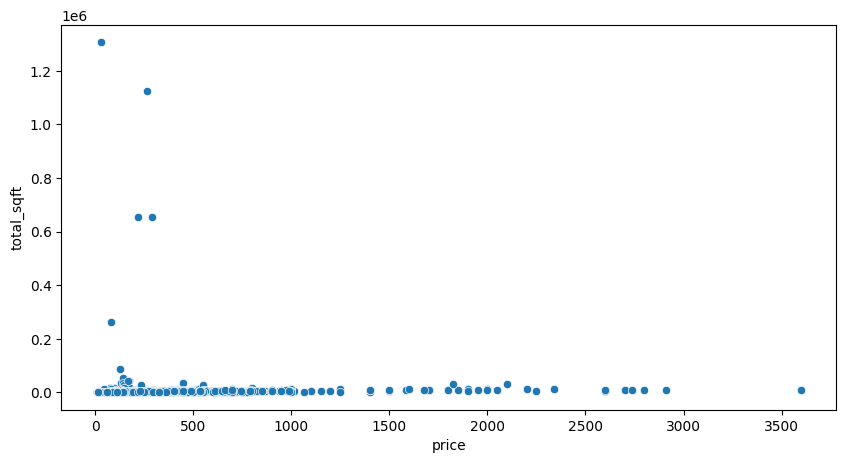

In [94]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df5["price"], y=df5["total_sqft"])

### Selecting the columns that contain 300> square feet area for 1 bedroom

In [95]:
df5_n = df5[~(df5["total_sqft"]/df5["size"]<300)]

In [96]:
df5_n.shape

(12555, 7)

<Axes: xlabel='price', ylabel='total_sqft'>

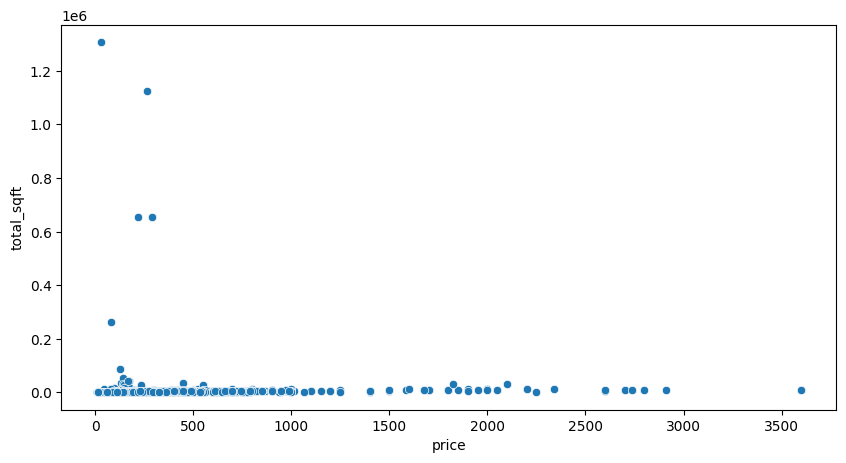

In [97]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df5_n["price"], y=df5_n["total_sqft"])

In [98]:
df5_n.select_dtypes(["int","float"]).corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.083022,0.865669,0.245218,0.479798
total_sqft,0.083022,1.000000,0.074769,0.012340,0.049393
bath,0.865669,0.074769,1.000000,0.241722,0.527157
balcony,0.245218,0.012340,0.241722,1.000000,0.123580
price,0.479798,0.049393,0.527157,0.123580,1.000000


In [99]:
# price_per_sqft column just create for outliers detection because original prices are too low
df5_n["price_per_sqft"] = df5_n["price"]*100000/df5_n["total_sqft"]

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_9240\1799111988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_n["price_per_sqft"] = df5_n["price"]*100000/df5_n["total_sqft"]


In [110]:
df5_n.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
3463,Built-up Area,Kasavanhalli,3,1719,3,2,116,6748.109366
7393,Built-up Area,other,2,1080,2,2,45,4166.666667
8287,Super built-up Area,other,3,1600,3,2,74,4625.000000
2190,Plot Area,other,4,1350,4,1,200,14814.814815
11442,Super built-up Area,other,2,976,2,1,50,5122.950820


### Use 1 Standard Deviation which contains 68% of data

In [105]:
# outlier removal from price_per_sqft
def remove_pps_outliers(dataframe):
    df_out = pd.DataFrame()
    for location, subdf in dataframe.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out

#### df6

In [106]:
df6 = remove_pps_outliers(df5_n)

In [107]:
df6.shape

(10618, 8)

Text(0.5, 1.0, 'PP_sqft after outlier removal')

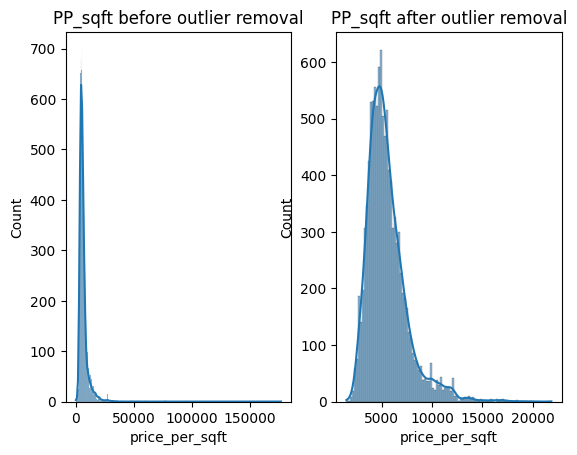

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.histplot(x=df5_n["price_per_sqft"], kde=True, ax=ax1)
ax1.set_title("PP_sqft before outlier removal")

sns.histplot(x=df6["price_per_sqft"], kde=True, ax=ax2)
ax2.set_title("PP_sqft after outlier removal")

In [111]:
df6.shape

(10618, 8)

#### df7

In [112]:
df7 = df6.copy()

In [115]:
df7.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
10545,Built-up Area,other,4,2700,3,2,230,8518.518519
8978,Super built-up Area,other,3,1260,2,1,95,7539.682540
8797,Super built-up Area,other,1,500,1,1,14,2800.000000
3107,Super built-up Area,Kanakpura Road,2,700,2,1,34,4857.142857
3882,Super built-up Area,Old Airport Road,4,2658,5,3,189,7110.609481


## Checking bedroom 2 total_sqft is greater that 3 sqft or not

In [118]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df["location"]==location) & (df["size"]==2)]
    bedroom_3 = df[(df["location"]==location) & (df["size"]==3)]
    
    fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
    
    sns.scatterplot(x=bedroom_2["total_sqft"], y=bedroom_2["price"], ax=ax1, marker=".",s =90, label="2 Bedrooms")
    sns.scatterplot(x=bedroom_3["total_sqft"], y=bedroom_3["price"], ax=ax1, marker="*",s =90, label="3 Bedrooms")
    ax1.set_title("Bedrooms are 2 and 3")

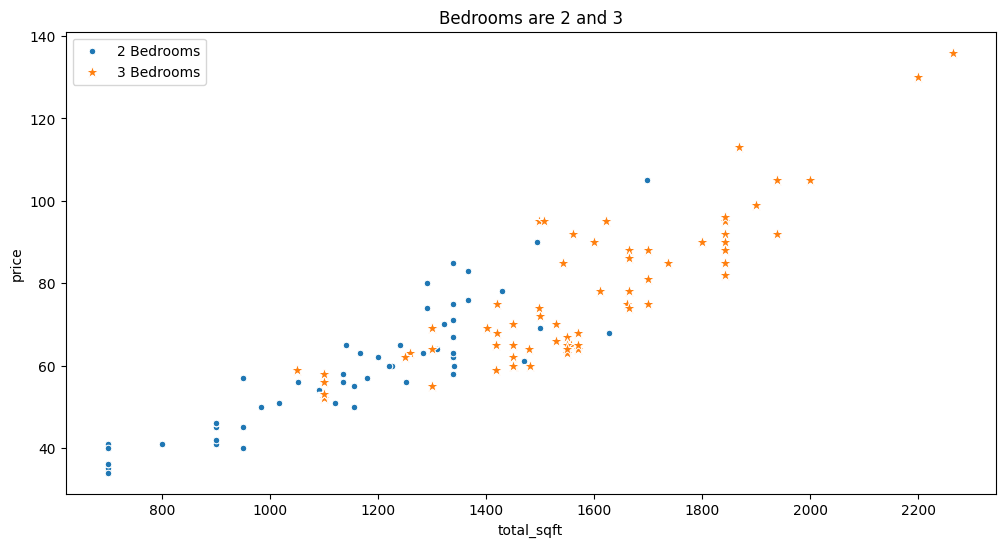

In [119]:
plot_scatter_chart(df7, "Kanakpura Road")

### Different Locations have different prices for houses so cleaning data according to locations

In [144]:
# outlier removal from square root area and bedrooms
def remove_bedroom_outlier(df):
    exlude_indexes = np.array([])
    for location, location_df in df.groupby("location"):
        bedroom_stats = {}
        for bed, bed_df in location_df.groupby("size"):
            bedroom_stats[bed] = {
                "mean" : np.mean(bed_df.price_per_sqft),
                "std"  : np.std(bed_df.price_per_sqft),
                "count": bed_df.shape[0]
            }
        for bed, bed_df in location_df.groupby("size"):
            stats = bedroom_stats.get(bed-1)
            if stats and stats["count"]>5:
                exlude_indexes = np.append(exlude_indexes, bed_df[bed_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exlude_indexes, axis="index")

#### df8

In [146]:
df8 = remove_bedroom_outlier(df7)

In [147]:
df8.shape

(6717, 8)

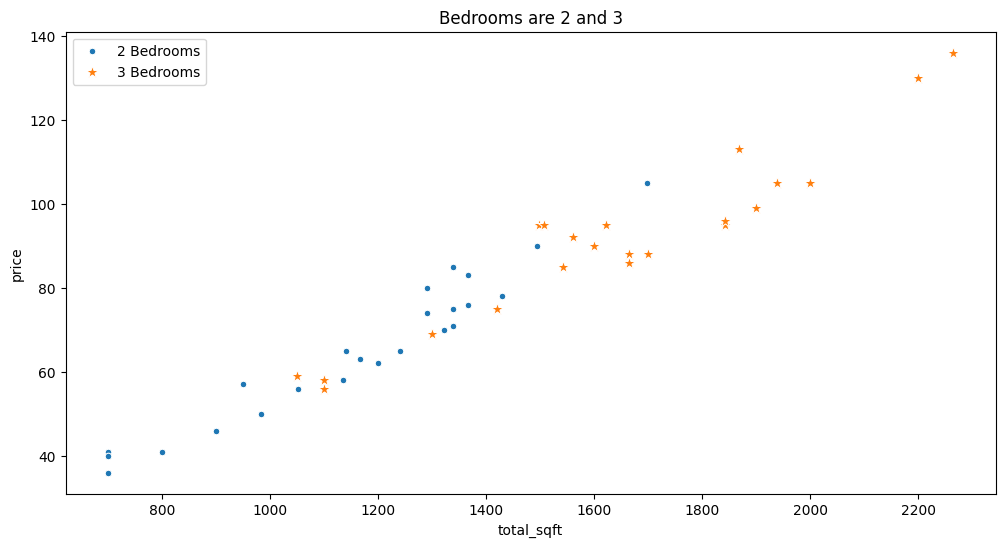

In [148]:
plot_scatter_chart(df8, "Kanakpura Road")

Text(0.5, 1.0, 'Price Boxplot')

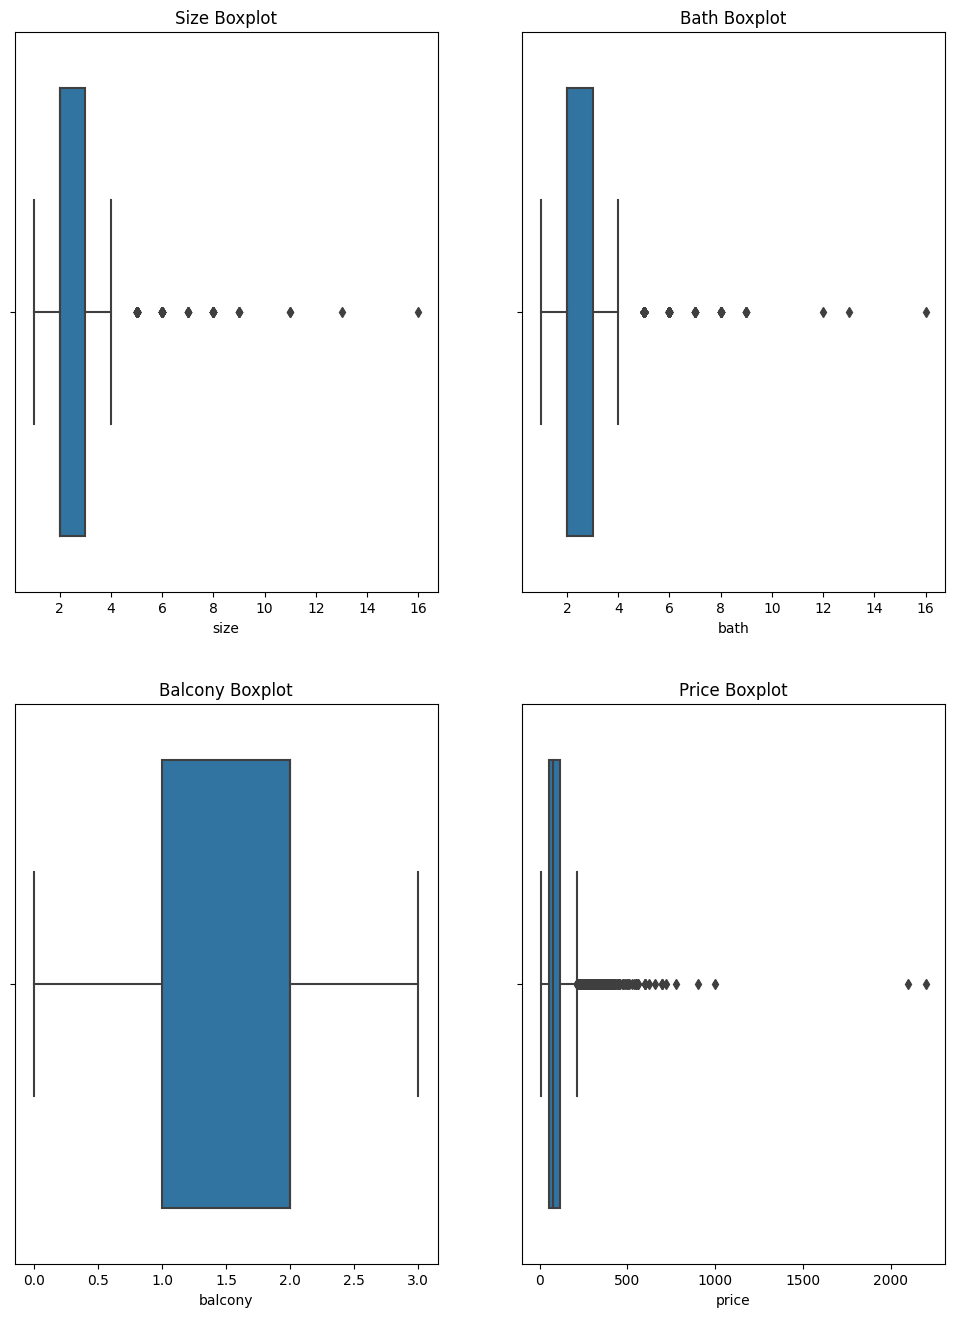

In [149]:
# Check distribution of data
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,16))

sns.boxplot(x=df8["size"], ax=axes[0,0])
axes[0,0].set_title("Size Boxplot")

sns.boxplot(x=df8["bath"], ax=axes[0,1])
axes[0,1].set_title("Bath Boxplot")

sns.boxplot(x=df8["balcony"], ax=axes[1,0])
axes[1,0].set_title("Balcony Boxplot")

sns.boxplot(x=df8["price"], ax=axes[1,1])
axes[1,1].set_title("Price Boxplot")

In [155]:
# it is impossible that 2 bedrooms house contains 5 to 6 baths, so clean data according to bedrooms and bath
df8[df8["bath"]>df8["size"]+1]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
416,Super built-up Area,Banashankari,3,2582,5,2,250,9682.416731
662,Super built-up Area,Begur Road,4,2464,6,0,118,4788.961039
1906,Super built-up Area,Harlur,3,2240,5,2,155,6919.642857
1964,Super built-up Area,Hebbal,3,3450,5,2,260,7536.231884
2062,Super built-up Area,Hebbal,3,3520,5,2,320,9090.909091
...,...,...,...,...,...,...,...,...
10192,Super built-up Area,other,2,600,4,1,70,11666.666667
10302,Plot Area,other,3,5656,5,0,499,8822.489392
10538,Super built-up Area,other,4,6652,6,1,660,9921.828022
10551,Plot Area,other,4,6688,6,1,700,10466.507177


#### df9

In [156]:
df9 = df8[df8["bath"]<df8["size"]+1]

In [157]:
df9.shape

(6260, 8)

In [158]:
df9.drop(columns=["price_per_sqft"], inplace=True)

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_9240\753056970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop(columns=["price_per_sqft"], inplace=True)


In [159]:
df9.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,5th Phase JP Nagar,2,1075,2,2,60
2,Built-up Area,5th Phase JP Nagar,2,1256,2,1,62
3,Super built-up Area,5th Phase JP Nagar,2,1207,2,2,63
4,Built-up Area,5th Phase JP Nagar,3,1725,2,2,100
5,Super built-up Area,5th Phase JP Nagar,2,1440,2,2,60


In [233]:
df9.select_dtypes(["int","float"]).corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.645902,0.911251,0.296061,0.590355
total_sqft,0.645902,1.000000,0.645882,0.261834,0.865571
bath,0.911251,0.645882,1.000000,0.311964,0.594000
balcony,0.296061,0.261834,0.311964,1.000000,0.224345
price,0.590355,0.865571,0.594000,0.224345,1.000000


# Model Building

In [282]:
df = df9.copy()

In [283]:
df.shape

(6260, 7)

In [284]:
df.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,5th Phase JP Nagar,2,1075,2,2,60
2,Built-up Area,5th Phase JP Nagar,2,1256,2,1,62
3,Super built-up Area,5th Phase JP Nagar,2,1207,2,2,63
4,Built-up Area,5th Phase JP Nagar,3,1725,2,2,100
5,Super built-up Area,5th Phase JP Nagar,2,1440,2,2,60


In [285]:
from sklearn.model_selection import train_test_split
# algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# accuracy measurement
from sklearn.metrics import mean_squared_error
# column transformer and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# encoders
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [286]:
x = df.drop("price", axis=1)
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [287]:
len(x_train)

5008

In [288]:
len(x_test)

1252

In [289]:
x_train.head(3)

,area_type,location,size,total_sqft,bath,balcony
689,Super built-up Area,Bellandur,3,1490,2,2
2936,Super built-up Area,Kaggadasapura,2,1180,1,0
4845,Super built-up Area,Talaghattapura,3,1868,3,2


In [290]:
y_train.head(3)

689      98
2936     50
4845    131
Name: price, dtype: int32

In [301]:
c1 = ColumnTransformer(transformers=[
    ("oneHotEncoder", OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore'), [0,1])
], remainder="passthrough")

c2 = ColumnTransformer(transformers=[
    ("minMaxScaler", MinMaxScaler(), slice(0,None))
])

## Model: Linear Regression 

In [302]:
c3 = LinearRegression()

In [303]:
pipe = Pipeline([
    ("c1", c1),
    ("c2", c2),
    ("c3", c3)
])

In [304]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('c1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1])])),
                ('c2',
                 ColumnTransformer(transformers=[('minMaxScaler',
                                                  MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('c3', LinearRegression())])

In [305]:
pred = pipe.predict(x_test)

In [306]:
pred

array([ 68.25158487, 112.04003462,  75.35108601, ...,  73.97009822,
        91.00439996, 135.00737609])

In [307]:
pipe.score(x_test, y_test)

0.828713726906598

## Model: Random Forest Regressor

In [308]:
rf = RandomForestRegressor()

pipe = Pipeline([
    ("c1", c1),
    ("c2", c2),
    ("c3", rf)
])

pipe.fit(x_train,  y_train)
pipe.score(x_test, y_test)

0.8445214243561238

### Random Forest Regressor performs well. So predict unseen datapoints from these model

In [342]:
d = pd.DataFrame({"area_type":["Super built-up Area"], "location":["Sarjapur Road"], "size":[2], "total_sqft":[965], "bath":[1], "balcony":[1]})

In [343]:
pipe.predict(d)

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([48.82])

In [360]:
df.sort_values(by="balcony",ascending=False)

,area_type,location,size,total_sqft,bath,balcony,price
9947,Built-up Area,other,2,1300,2,3,95
3036,Super built-up Area,Kanakpura Road,2,1290,2,3,74
3548,Super built-up Area,Kundalahalli,3,1724,3,3,140
3040,Super built-up Area,Kanakpura Road,3,1542,2,3,85
8449,Built-up Area,other,2,1158,2,3,75
...,...,...,...,...,...,...,...
8377,Plot Area,other,4,1355,3,0,135
6294,Super built-up Area,other,3,1200,3,0,90
7212,Plot Area,other,2,1200,2,0,130
7214,Plot Area,other,1,800,1,0,52


In [349]:
import pickle

pickle.dump(pipe, open("pipeline.pkl","wb"))
pickle.dump(df, open("dataset.pkl","wb"))

## Model: Decision Tree Regressor

In [272]:
dt = DecisionTreeRegressor()

pipe = Pipeline([
    ("c1", c1),
    ("c2", c2),
    ("c3", dt)
])

pipe.fit(x_train,  y_train)
pipe.score(x_test, y_test)

0.7190908885292965

## Model: Support Vector Regressor

In [221]:
svr = SVR(C=200)

pipe = Pipeline([
    ("c1", c1),
    ("c2", c2),
    ("c3", svr)
])

pipe.fit(x_train,  y_train)
pipe.score(x_test, y_test)

0.7958491754215635

## Model: KNeighbors Regressor

In [230]:
knn = KNeighborsRegressor(n_neighbors=50)

pipe = Pipeline([
    ("c1", c1),
    ("c2", c2),
    ("c3", knn)
])

pipe.fit(x_train,  y_train)
pipe.score(x_test, y_test)

0.5450881242765471

# Trying Additional Thing: Outlier Removal using IQR method 

In [258]:
df_n = df9.copy()

In [264]:
df_n.shape

(6260, 7)

In [259]:
def outlier_removal(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    new_df = df[(df[col]>lower_limit) & (df[col]<upper_limit)]
    return new_df

In [260]:
do_1 = outlier_removal(df_n, "size")
do_1.shape

(6160, 7)

In [261]:
do_2 = outlier_removal(do_1, "bath")
do_2.shape

(6160, 7)

In [262]:
do_3 = outlier_removal(do_2, "price")
do_3.shape

(5734, 7)

In [263]:
do_3.shape

(5734, 7)

In [267]:
do_3.select_dtypes(["int","float"]).corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.726617,0.866768,0.319632,0.676673
total_sqft,0.726617,1.000000,0.717036,0.345702,0.790732
bath,0.866768,0.717036,1.000000,0.336854,0.667204
balcony,0.319632,0.345702,0.336854,1.000000,0.262432
price,0.676673,0.790732,0.667204,0.262432,1.000000


In [268]:
df.select_dtypes(["int","float"]).corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.645902,0.911251,0.296061,0.590355
total_sqft,0.645902,1.000000,0.645882,0.261834,0.865571
bath,0.911251,0.645882,1.000000,0.311964,0.594000
balcony,0.296061,0.261834,0.311964,1.000000,0.224345
price,0.590355,0.865571,0.594000,0.224345,1.000000


In [265]:
x = do_3.drop("price", axis=1)
y = do_3["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [266]:
lr = RandomForestRegressor()

pipe = Pipeline([
    ("c1", c1),
    ("c2", c2),
    ("c3", lr)
])

pipe.fit(x_train,  y_train)
pipe.score(x_test, y_test)

0.8070995415218951

Text(0.5, 1.0, 'Price Boxplot')

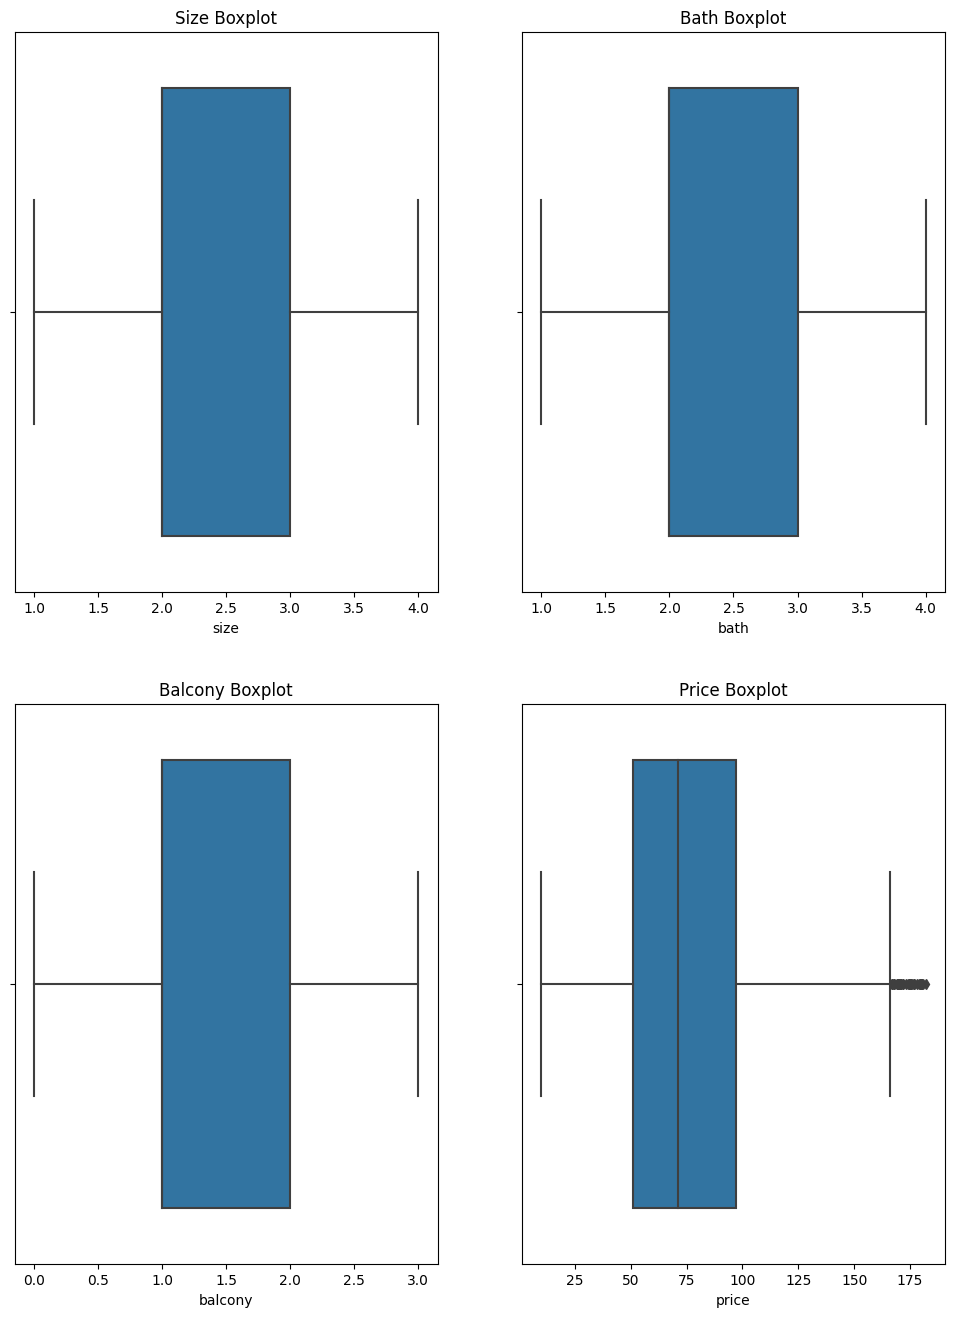

In [269]:
# Check distribution of data
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,16))

sns.boxplot(x=do_3["size"], ax=axes[0,0])
axes[0,0].set_title("Size Boxplot")

sns.boxplot(x=do_3["bath"], ax=axes[0,1])
axes[0,1].set_title("Bath Boxplot")

sns.boxplot(x=do_3["balcony"], ax=axes[1,0])
axes[1,0].set_title("Balcony Boxplot")

sns.boxplot(x=do_3["price"], ax=axes[1,1])
axes[1,1].set_title("Price Boxplot")

### This method removes outliers but accuracy of models was not better after applying it. So I skip this additional part.